# ELE 435-535 LAB 6

### Name: Prerit Terway
### Enrollment: ELE 535

### Import Required Packages

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [408]:
# Functions for packing and unpacking images
def packcw(A,nr,nc):
    x = (A.T).reshape(nr*nc,1)
    return x

def unpackcw(x,nr,nc):
    A = x.reshape(nc,nr)
    return A.T

def packrw(A,nr,nc):
    x = A.reshape(nr*nc,1)
    return x

def unpackrw(x,nr,nc):
    A = x.reshape(nr,nc)
    return A

### Load Data

In [409]:
# Load MNIST train and test data
train = np.load('MNISTcwtrain1000.npy')
train = train.astype(float)/255
test = np.load('MNISTcwtest100.npy')
test = test.astype(float)/255 
# Images are normalized to [0,1]
size = train.shape[0]
n_train = train.shape[1]
n_test = test.shape[1]

print ('-----MNIST Dataset Loaded-----')
print ('Train Data: %d x %d' %(size,n_train))
print ('Test Data: %d x %d' %(size,n_test))

-----MNIST Dataset Loaded-----
Train Data: 784 x 10000
Test Data: 784 x 1000


## Minimum MSE Estimation of Hidden Data

1.Compute the mean and the covariance matrix of the training data.

In [410]:
covariance_train = np.cov(train)
mean_train = np.mean(train, axis=1)
covariance_train.shape

(784, 784)

### Right half hidden

2.Implement a function to hide the right half of the image (Fill 14 columns on the right with black). (Hint: Find the indices of the hidden area) 

In [411]:
def hide_columns(imageTrain, columns_to_hide):
    hidden_image  = np.copy(imageTrain )
    # assume image is 28*28 pixels
    for j in columns_to_hide:
        hidden_image[:,columns_to_hide]  = 0
    return hidden_image

3.Find the minimum MSE estimator $W^*$ (Note: It is recommended to implement it as a function because you will need it again for questions below).

Full images of the training data are available. If you refer to the notes, $X$ can be considered as the given region of the image and $Y$ can be considered as the hidden region. Mean and covariance of the training data can be divided according to the indices of given and hidden pixels.

In [412]:
# Example function
def Wstar_miss(sigma, missing_indices):
    total_features = sigma.shape[0]
    all_features = list(range(0, total_features))
    present_features = np.setdiff1d(all_features,missing_indices)
    sigma_x = sigma[np.ix_(present_features,present_features)]
    
    sigma_y = sigma[np.ix_(missing_indices,missing_indices)]
    
    sigma_xy = sigma[np.ix_(present_features,missing_indices)]
#     plt.imshow(sigma_xy)
    sigma_yx = sigma[np.ix_(missing_indices,present_features)]
    Wstar = np.dot(sigma_yx,np.linalg.pinv(sigma_x))
    
    return Wstar

4.Using the estimator, approximate the right half of the hidden image. Choose any 5 images in the test data and display the 1)original image, 2)hidden image, and 3)approximated image. Calculate the mean squared error for each example.

In [413]:
hidden_indices = list(range(392, 784))
columns_to_hide = list(range(14, 28))

In [414]:
W_star = Wstar_miss(covariance_train, hidden_indices)
W_star = W_star.T
ux = mean_train[list(range(0, 392))]
uy = mean_train[hidden_indices]
x_minus_ux = test[list(range(0, 392)),:] - ux[:,None]
y_hat = np.dot(W_star.T,x_minus_ux) + uy[:,None]
total_estimated = np.vstack((test[list(range(0, 392)),:],y_hat))      
    

In [419]:
images_chosen = np.random.randint(1,999,5)
images_chosen_to_list = np.ndarray.tolist(images_chosen)

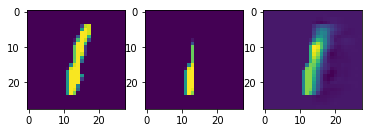

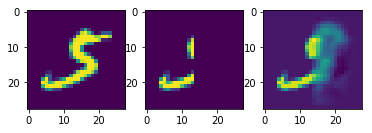

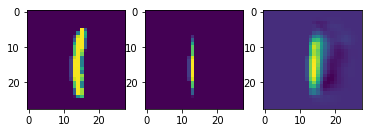

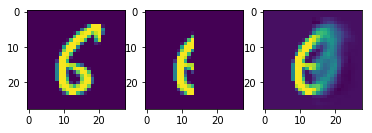

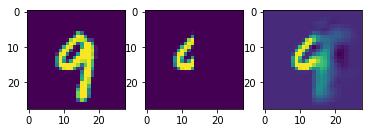

In [420]:
error = []
for j in images_chosen_to_list:
    image_chosen = np.copy(test[:,j])
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(unpackcw(image_chosen,28,28))
    image_hidden = hide_columns(unpackcw(image_chosen,28,28), columns_to_hide)
    plt.subplot(1,3,2)
    plt.imshow(image_hidden)
    plt.subplot(1,3,3)
    estimated_image = total_estimated[:,j]
    plt.imshow(unpackcw(estimated_image,28,28))
    mse_this_eg =  ((estimated_image - image_chosen)**2).mean(axis=None)
    error.append(mse_this_eg)

In [421]:
print("MSE for the above images are",error)

MSE for the above images are [0.010375489262372306, 0.021075459012491457, 0.01232785075039892, 0.02372827032743587, 0.02450935074015831]


5.Hide different amount of area (hide 0~28 columns) then compute the MSE for each approximated image (Use the first test image). Plot the MSE versus number of columns hidden.

In [422]:
error = []
for j in range(0,28):
    hidden_indices = list(range(784-j*28, 784))
    W_star = Wstar_miss(covariance_train, hidden_indices)
    W_star = W_star.T
    ux = mean_train[list(range(0, 784-j*28))]
    uy = mean_train[hidden_indices]
    x_minus_ux = test[list(range(0, 784-j*28)),:] - ux[:,None]
    y_hat = np.dot(W_star.T,x_minus_ux) + uy[:,None]
    total_estimated = np.vstack((test[list(range(0, 784-j*28)),:],y_hat))
    image_chosen = np.copy(test[:,0])
    estimated_image = total_estimated[:,0]
    mse_this_eg =  ((estimated_image - image_chosen)**2).mean(axis=None)
    error.append(mse_this_eg)

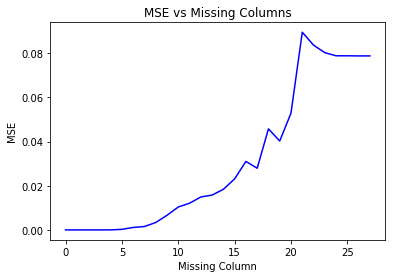

In [423]:
plt.figure()
plt.plot(list(range(0,28)), error, color = (0,0,1))
plt.title('MSE vs Missing Columns')
plt.xlabel("Missing Column")
plt.ylabel("MSE")
plt.show()

### Center hidden

6.Implement a function to hide the center of the image (Fill 8x8 square in the center with black). (Hint: Find the indices of the hidden area) 

In [424]:
def hide_center(imageTrain, central_region):
    hidden_image  = np.copy(imageTrain )
    center = 14
    hidden_image[center-central_region:center+central_region,center-central_region:center+central_region]  = 0
    return hidden_image

7.Find the minimum MSE estimator $W^*$.

In [425]:
# Example function
def Wstar_miss2(sigma, missing_indices):
    total_features = sigma.shape[0]
    all_features = list(range(0, total_features))
    present_features = np.setdiff1d(all_features,missing_indices)
    sigma_x = sigma[np.ix_(present_features,present_features)]
    
    sigma_y = sigma[np.ix_(missing_indices,missing_indices)]
    
    sigma_xy = sigma[np.ix_(present_features,missing_indices)]
#     plt.imshow(sigma_xy)
    sigma_yx = sigma[np.ix_(missing_indices,present_features)]
    Wstar = np.dot(sigma_yx,np.linalg.pinv(sigma_x))
    
    return Wstar

8.Using the estimator, approximate the center of the hidden image. Choose any 5 images in the test data and display the 1)original image, 2)hidden image, and 3)approximated image. Calculate the MSE for each example.

In [426]:
temp_image = np.zeros((28,28))
center = 14
central_region = 4
temp_image[center-central_region:center+central_region,center-central_region:center+central_region]  = 1
# plt.imshow(temp_image)
temp2 = temp_image.flatten('F')

hidden_indices = np.where(temp2==1)

In [427]:
all_features = list(range(0, 784))
# all_features

In [428]:
present_features = np.setdiff1d(all_features,hidden_indices)
# present_features

In [429]:
hidden_indices = np.ndarray.tolist(hidden_indices[0])

In [430]:
W_star = Wstar_miss(covariance_train, hidden_indices)
W_star = W_star.T
ux = mean_train[present_features]
uy = mean_train[hidden_indices]
x_minus_ux = test[present_features,:] - ux[:,None]
y_hat = np.dot(W_star.T,x_minus_ux) + uy[:,None]
y_predicted_combined = np.zeros_like(test)
y_predicted_combined[present_features,:] = test[present_features,:]
y_predicted_combined[hidden_indices,:] = y_hat

# total_estimated = np.vstack((test[list(range(0, 392)),:],y_hat))      
    

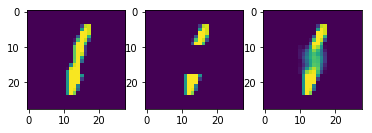

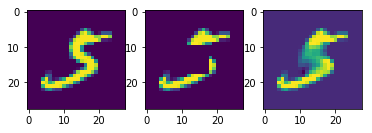

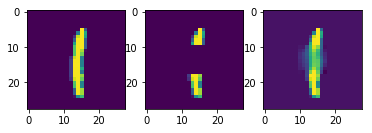

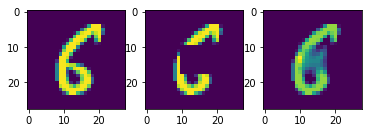

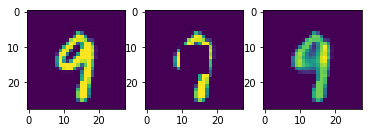

In [432]:
# Example output
# images_chosen = np.random.randint(1,999,5)
# images_chosen_to_list = np.ndarray.tolist(images_chosen)
error = []
for j in images_chosen_to_list:
    image_chosen = np.copy(test[:,j])
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(unpackcw(image_chosen,28,28))
    image_hidden = hide_center(unpackcw(image_chosen,28,28), 4)
    plt.subplot(1,3,2)
    plt.imshow(image_hidden)
    estimated_image = y_predicted_combined[:,j]
    plt.subplot(1,3,3)
    plt.imshow(unpackcw(estimated_image,28,28))
    mse_this_eg =  ((estimated_image - image_chosen)**2).mean(axis=None)
    error.append(mse_this_eg)
#     print('MSE is',mse_this_eg)
#     plt.colorbar()

In [433]:
print("MSE for the above images are",error)

MSE for the above images are [0.005891418767018465, 0.006187637018911118, 0.002712800207264896, 0.008787248160474109, 0.007426839202754425]


9.Use the least square method to approximate the center pixels for same images in question 8. 

\begin{equation}
\arg \min_{W\in\mathbb{R}^{64x(784-64)}} \sum_{i=1}^{n}\|y_i-W x_i\|_2^2
\end{equation}
\begin{equation}
y_i \in \mathbb{R}^{64}, \hspace{5mm} x_i \in \mathbb{R}^{(784-64)}
\end{equation}

$y_i$ is the vector of 64 hidden pixels, $x_i$ is the rest of the pixels given, and $n$ is the total number of samples for the digit.

Calculate the MSE for each example (for the same images).

In [434]:
X = np.matrix(train[present_features,:])
y = np.matrix(train[hidden_indices,:])
F = X.T
y_f = y.T
u, s, vh = np.linalg.svd(F, full_matrices=False)
s = np.diag(1/s)
Wtemp = np.matmul(vh.T,s)
Wtemp2 = np.matmul(Wtemp,u.T)
W = np.matmul(Wtemp2,y_f)

In [440]:
# W.shape

In [439]:
x_test = np.matrix(test[present_features,:])
# x_test.shape

In [438]:
y_tilda = np.matmul(x_test.T,W)
# y_tilda.shape

In [441]:
test.shape

(784, 1000)

In [442]:
y_predicted_combined_ls = np.zeros_like(test)
y_predicted_combined_ls[present_features,:] = test[present_features,:]
y_predicted_combined_ls[hidden_indices,:] = y_tilda.T

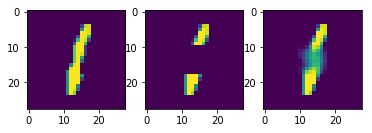

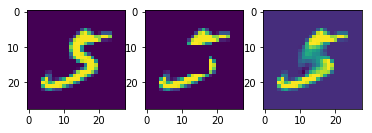

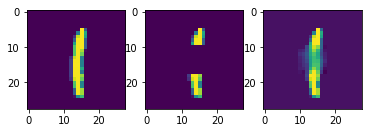

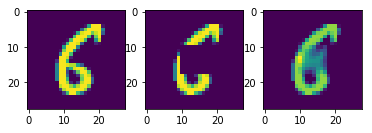

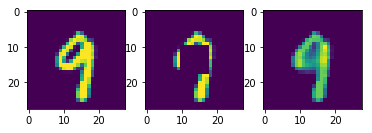

In [444]:
error = []
for j in images_chosen_to_list:
    image_chosen = np.copy(test[:,j])
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(unpackcw(image_chosen,28,28))
    image_hidden = hide_center(unpackcw(image_chosen,28,28), 4)
    plt.subplot(1,3,2)
    plt.imshow(image_hidden)
    plt.subplot(1,3,3)
#     estimated_image = 
    estimated_image = y_predicted_combined_ls[:,j]

    plt.imshow(unpackcw(estimated_image,28,28))
    mse_this_eg =  ((estimated_image - image_chosen)**2).mean(axis=None)
    error.append(mse_this_eg)

In [445]:
print("MSE for the above images are",error)

MSE for the above images are [0.005950156557041532, 0.006744338544864667, 0.002879303898587069, 0.009379394494728792, 0.007786511643477478]


10.Suppose you have a test data with hidden centers (8x8 square). Approximate the hidden area of each image then use the nearest class mean classifier to classify the test data. Compare the accuracy with the experiment from HW1, which had an accuracy of 76.7%.

In [446]:
mean_train_lse = np.zeros((train.shape[0],10))
k = 0
for j in range(0,train.shape[1],1000):
    this_digit_data = train[:,j:j+1000]
    mean_train_lse[:,k] = np.mean(this_digit_data,axis=1)
    k+=1

In [447]:
correct_test_label = [] 
for j in range (0,10):
    correct_test_label += [j]*100
# correct_test_label

In [448]:
approximated_data_mmse = y_predicted_combined
predicted_test_labels = np.zeros((test.shape[1]))
error = 0
for j in range(0,test.shape[1]):
    this_test = approximated_data_mmse[:,j]
    error_for_all_labels = np.power(mean_train_lse - this_test[:,None],2)
    normed_error_sq = error_for_all_labels.sum(axis = 0)
#     print(np.argmin(normed_error_sq))
    predicted_test_labels[j] = np.argmin(normed_error_sq)

In [449]:
test_accuracy = sum(predicted_test_labels == correct_test_label)/len(correct_test_label)
test_accuracy

0.702

In [450]:
print("test accuracy with hidden region is ", test_accuracy)

test accuracy with hidden region is  0.702


## This accuracy is lower than HW1 which is expected as we are removing information from the test data

11.Try changing the hidden area (4x4,8x8,12x12,16x16,20x20) and check the accuracy of the classificaiton using the nearest class mean classifier. Plot the accuracy versus hidden area.

In [451]:
# present_features
ux = mean_train[present_features]
uy = mean_train[hidden_indices]
ux.shape

(720,)

In [389]:
accuracy = []
hidden_areas = [2,4,6,8,10]
for hidden_from_center in hidden_areas:
    temp_image = np.zeros((28,28))
    center = 14
    central_region = hidden_from_center
    temp_image[center-central_region:center+central_region,center-central_region:center+central_region]  = 1
    temp2 = temp_image.flatten('F')
    hidden_indices = np.where(temp2==1)
    present_features = np.setdiff1d(all_features,hidden_indices)
    hidden_indices = np.ndarray.tolist(hidden_indices[0])
    W_star = Wstar_miss(covariance_train, hidden_indices)
    W_star = W_star.T
    ux = mean_train[present_features]
    uy = mean_train[hidden_indices]
    x_minus_ux = test[present_features,:] - ux[:,None]
    y_hat = np.dot(W_star.T,x_minus_ux) + uy[:,None]
    y_predicted_combined = np.zeros_like(test)
    y_predicted_combined[present_features,:] = test[present_features,:]
    y_predicted_combined[hidden_indices,:] = y_hat
    
    approximated_data_mmse = y_predicted_combined
    predicted_test_labels = np.zeros((test.shape[1]))
    error = 0
    for j in range(0,test.shape[1]):
        this_test = approximated_data_mmse[:,j]
        error_for_all_labels = np.power(mean_train_lse - this_test[:,None],2)
        normed_error_sq = error_for_all_labels.sum(axis = 0)
    #     print(np.argmin(normed_error_sq))
        predicted_test_labels[j] = np.argmin(normed_error_sq)
#         print(predicted_test_labels[j])
    test_accuracy = sum(predicted_test_labels == correct_test_label)/len(correct_test_label)
    print(test_accuracy)
    accuracy.append(test_accuracy)

0.754
0.702
0.645
0.534
0.337


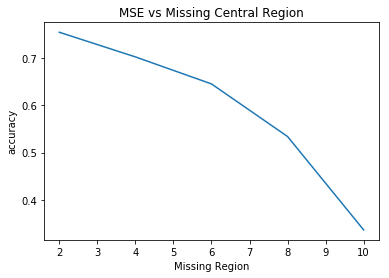

In [452]:
plt.plot(np.asarray(hidden_areas),accuracy)
plt.title('MSE vs Missing Central Region')
plt.xlabel("Missing Region")
plt.ylabel("accuracy")
plt.show()